In [41]:
from collections import Counter
from tabulate import tabulate
import matplotlib.pyplot as plt
from math import gcd
from functools import reduce
import time, re

In [42]:
start_kripta = time.time()
def preprocess_text(text):
    """Membersihkan teks, hanya menyisakan huruf kapital A-Z (opsional)"""
    return re.sub(r'[^A-Z]', '', text.upper())

def count_letters(text):
    """Menghitung frekuensi huruf dalam teks"""
    return Counter(text)

def calculate_percentage(letter_counts, total):
    """Menghitung persentase frekuensi huruf terhadap total teks"""
    return [(letter, count, f"{(count / total) * 100:.2f}%") for letter, count in letter_counts]

In [43]:
def plot_letter_frequencies(letter_counts):
    """Menampilkan grafik batang frekuensi huruf"""
    letters, counts = zip(*letter_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(letters, counts, color='skyblue')
    plt.xlabel('Huruf')
    plt.ylabel('Frekuensi')
    plt.title('Frekuensi Huruf dalam Ciphertext')
    plt.show()

def detect_language(most_frequent_letter):
    """Menentukan kemungkinan bahasa berdasarkan huruf paling sering muncul"""
    english_common = {'E', 'T', 'A', 'O', 'I', 'N'}
    indonesian_common = {'A', 'N', 'I', 'E', 'T', 'U'}

    if most_frequent_letter in english_common:
        return "plaintext dalam Bahasa Inggris"
    elif most_frequent_letter in indonesian_common:
        return "plaintext dalam Bahasa Indonesia"
    else:
        return "bahasa tidak dapat dipastikan"

In [44]:
def plot_letter_frequencies(letter_counts):
    """Menampilkan grafik batang frekuensi huruf"""
    letters, counts = zip(*letter_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(letters, counts, color='skyblue')
    plt.xlabel('Huruf')
    plt.ylabel('Frekuensi')
    plt.title('Frekuensi Huruf dalam Ciphertext')
    plt.show()

In [45]:
def detect_language(most_frequent_letter):
    """Menentukan kemungkinan bahasa berdasarkan huruf paling sering muncul"""
    english_common = {'E', 'T', 'A', 'O', 'I', 'N'}
    indonesian_common = {'A', 'N', 'I', 'E', 'T', 'U'}

    if most_frequent_letter in english_common:
        return "plaintext dalam Bahasa Inggris"
    elif most_frequent_letter in indonesian_common:
        return "plaintext dalam Bahasa Indonesia"
    else:
        return "bahasa tidak dapat dipastikan"

In [46]:
def find_repeating_sequences(ciphertext, min_length=5, max_length=10):
    """Mencari pola berulang dalam ciphertext dengan panjang tertentu"""
    repeated_sequences = {}
    for length in range(min_length, max_length + 1):
        for i in range(len(ciphertext) - length + 1):
            seq = ciphertext[i:i+length]
            if seq not in repeated_sequences:
                positions = [i]
                for j in range(i + 1, len(ciphertext) - length + 1):
                    if ciphertext[j:j+length] == seq:
                        positions.append(j)
                if len(positions) > 1:
                    repeated_sequences[seq] = positions
    return repeated_sequences

def calculate_distances(positions):
    """Menghitung jarak antara kemunculan pola berulang"""
    return [positions[i] - positions[i-1] for i in range(1, len(positions))]

def find_gcd_of_distances(distances):
    """Menentukan FPB dari jarak-jarak yang ditemukan"""
    return reduce(gcd, distances) if distances else 0

def group_by_key_position(ciphertext, key_length):
    """Mengelompokkan ciphertext berdasarkan posisi dalam panjang kunci"""
    groups = [''] * key_length
    for i, char in enumerate(ciphertext):
        groups[i % key_length] += char
    return groups


Frekuensi Huruf:
| Huruf   |   Frekuensi | Persentase   |
|---------|-------------|--------------|
| E       |          87 | 6.05%        |
| I       |          84 | 5.84%        |
| S       |          79 | 5.49%        |
| O       |          76 | 5.29%        |
| K       |          75 | 5.22%        |
| T       |          73 | 5.08%        |
| Z       |          72 | 5.01%        |
| W       |          66 | 4.59%        |
| Y       |          62 | 4.31%        |
| C       |          60 | 4.17%        |
| V       |          59 | 4.10%        |
| A       |          58 | 4.03%        |
| L       |          56 | 3.89%        |
| P       |          51 | 3.55%        |
| G       |          49 | 3.41%        |
| R       |          49 | 3.41%        |
| D       |          49 | 3.41%        |
| N       |          47 | 3.27%        |
| M       |          42 | 2.92%        |
| B       |          40 | 2.78%        |
| U       |          39 | 2.71%        |
| J       |          39 | 2.71%        

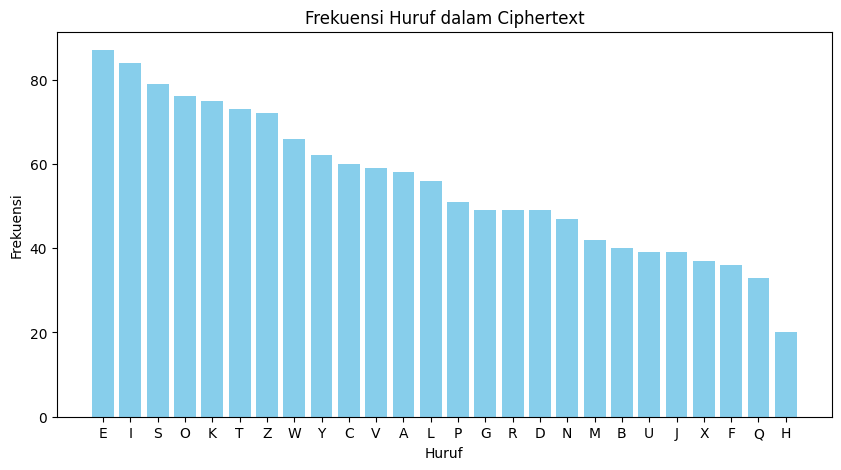


Huruf yang paling sering muncul: E
Analisis bahasa: plaintext dalam Bahasa Inggris


In [47]:
# open cipher file
with open("vigenere_cipher.txt", "r") as file:
    cipherfile = file.read().replace("\n", "")

cipherfile = preprocess_text(cipherfile)
letter_counts = count_letters(cipherfile)
sorted_letter_counts = sorted(letter_counts.items(), key=lambda x: x[1], reverse=True)
total_letters = sum(letter_counts.values())
letter_frequencies = calculate_percentage(sorted_letter_counts, total_letters)

print("\nFrekuensi Huruf:")
print(tabulate(letter_frequencies, headers=["Huruf", "Frekuensi", "Persentase"], tablefmt="github"))
plot_letter_frequencies(sorted_letter_counts)

most_frequent_letter = sorted_letter_counts[0][0]
language_guess = detect_language(most_frequent_letter)
print(f"\nHuruf yang paling sering muncul: {most_frequent_letter}")
print(f"Analisis bahasa: {language_guess}")

In [48]:
def find_repeating_sequences(ciphertext, min_length=5, max_length=16):
    """Mencari pola berulang dalam ciphertext"""
    repeated_sequences = {}
    for length in range(min_length, max_length + 1):
        for i in range(len(ciphertext) - length + 1):
            seq = ciphertext[i:i+length]
            if seq not in repeated_sequences:
                positions = [i]
                for j in range(i + 1, len(ciphertext) - length + 1):
                    if ciphertext[j:j+length] == seq:
                        positions.append(j)
                if len(positions) > 1:
                    repeated_sequences[seq] = positions
    return repeated_sequences

def calculate_distances(positions):
    """Menghitung jarak antara pola berulang"""
    return [positions[i] - positions[i-1] for i in range(1, len(positions))]

In [49]:
def frequency_analysis(text):
    """Melakukan analisis frekuensi pada teks"""
    return Counter(text)

def find_likely_shift(cipher_group):
    """Menentukan pergeseran paling mungkin berdasarkan analisis frekuensi"""
    english_freq = {
        'E': 12.02, 'T': 9.10, 'A': 8.12, 'O': 7.68, 'I': 7.31, 'N': 6.95, 'S': 6.28, 'R': 6.02,
        'H': 5.92, 'D': 4.32, 'L': 3.98, 'U': 2.88, 'C': 2.71, 'M': 2.61, 'F': 2.30, 'Y': 2.11,
        'W': 2.09, 'G': 2.03, 'P': 1.82, 'B': 1.49, 'V': 1.11, 'K': 0.69, 'X': 0.17, 'Q': 0.11,
        'J': 0.10, 'Z': 0.07
    }
    cipher_freq = frequency_analysis(cipher_group)
    total_chars = len(cipher_group)
    shift_scores = []
    for shift in range(26):
        score = 0
        for cipher_char, count in cipher_freq.items():
            plain_char = chr(((ord(cipher_char) - ord('A') - shift) % 26) + ord('A'))
            cipher_char_freq = (count / total_chars) * 100
            expected_freq = english_freq.get(plain_char, 0)
            score += abs(cipher_char_freq - expected_freq)
        shift_scores.append((shift, score))
    shift_scores.sort(key=lambda x: x[1])
    return shift_scores[0][0]

In [50]:
print("\nMencari yang Pola Berulang...")
repeated_sequences = find_repeating_sequences(cipherfile)
sorted_repeats = sorted(repeated_sequences.items(), key=lambda x: len(x[0]))

print(f"\nTotal pola berulang ditemukan: {len(repeated_sequences)}")

data = []
gcd_values = []
all_distances = []
for seq, positions in sorted_repeats:
    distances = calculate_distances(positions)
    if distances:
        gcd_value = find_gcd_of_distances(distances)
        gcd_values.append(gcd_value)
        all_distances.extend(distances)
        data.append((len(seq), seq, positions, distances, gcd_value))

print("\nPola Berulang yang Ditemukan:")
print(tabulate(data, headers=["Panjang", "Pola", "Posisi", "Jarak", "FPB"], tablefmt="github"))


Mencari yang Pola Berulang...

Total pola berulang ditemukan: 234

Pola Berulang yang Ditemukan:
|   Panjang | Pola             | Posisi       | Jarak   |   FPB |
|-----------|------------------|--------------|---------|-------|
|         5 | UIGVT            | [0, 552]     | [552]   |   552 |
|         5 | IGVTZ            | [1, 553]     | [552]   |   552 |
|         5 | GVTZG            | [2, 554]     | [552]   |   552 |
|         5 | VTZGB            | [3, 555]     | [552]   |   552 |
|         5 | TZGBS            | [4, 556]     | [552]   |   552 |
|         5 | ZGBSG            | [5, 557]     | [552]   |   552 |
|         5 | GBSGP            | [6, 558]     | [552]   |   552 |
|         5 | CZMZM            | [60, 1412]   | [1352]  |  1352 |
|         5 | ZMZMK            | [61, 1413]   | [1352]  |  1352 |
|         5 | DYCLV            | [69, 565]    | [496]   |   496 |
|         5 | YCLVU            | [70, 566]    | [496]   |   496 |
|         5 | CLVUY            | [71, 567]  

In [51]:
print("Mencari Faktorisasi")

factor_counts = Counter()
for distance in all_distances:
    for i in range(2, distance + 1):
        if distance % i == 0:
            factor_counts[i] += 1

sorted_factors = sorted(factor_counts.items(), key=lambda x: x[1], reverse=True)

# Membuat data untuk tabel
factor_table = [(factor, count) for factor, count in sorted_factors]

# Menggunakan tabulate untuk menampilkan tabel faktor
print("\nFaktor dari jarak (berdasarkan frekuensi):")
print(tabulate(factor_table, headers=["Faktor", "Frekuensi"], tablefmt="github"))

# Menentukan kemungkinan panjang kunci
possible_key_lengths = [factor for factor, count in sorted_factors[:3]]
print("\nKemungkinan panjang kunci berdasarkan analisis faktor:", possible_key_lengths)

Mencari Faktorisasi

Faktor dari jarak (berdasarkan frekuensi):
|   Faktor |   Frekuensi |
|----------|-------------|
|        2 |         234 |
|        4 |         234 |
|        8 |         234 |
|       16 |         143 |
|       32 |         117 |
|       13 |          83 |
|       26 |          83 |
|       52 |          83 |
|      104 |          83 |
|      208 |          80 |
|      416 |          79 |
|        3 |          68 |
|        6 |          68 |
|       12 |          68 |
|       24 |          68 |
|       11 |          49 |
|       22 |          49 |
|       44 |          49 |
|       88 |          49 |
|       64 |          39 |
|       48 |          37 |
|      121 |          36 |
|      242 |          36 |
|      484 |          36 |
|      968 |          36 |
|       96 |          36 |
|      128 |          36 |
|      192 |          36 |
|      256 |          36 |
|      384 |          36 |
|      768 |          36 |
|       23 |          29 |
|       46 |      

In [52]:
def group_by_key_position(ciphertext, key_length):
    """Membagi teks menjadi kelompok berdasarkan panjang kunci"""
    groups = [''] * key_length
    for i, char in enumerate(ciphertext):
        groups[i % key_length] += char
    return groups

def frequency_analysis(text):
    """Melakukan analisis frekuensi pada teks"""
    return Counter(text)

def find_likely_shift(cipher_group):
    """Menentukan pergeseran paling mungkin berdasarkan analisis frekuensi"""
    english_freq = {
        'E': 12.02, 'T': 9.10, 'A': 8.12, 'O': 7.68, 'I': 7.31, 'N': 6.95, 'S': 6.28, 'R': 6.02,
        'H': 5.92, 'D': 4.32, 'L': 3.98, 'U': 2.88, 'C': 2.71, 'M': 2.61, 'F': 2.30, 'Y': 2.11,
        'W': 2.09, 'G': 2.03, 'P': 1.82, 'B': 1.49, 'V': 1.11, 'K': 0.69, 'X': 0.17, 'Q': 0.11,
        'J': 0.10, 'Z': 0.07
    }
    cipher_freq = frequency_analysis(cipher_group)
    total_chars = len(cipher_group)

    # Coba untuk shift sebanyak 25 kali
    shift_scores = []
    for shift in range(26):
        score = 0
        for cipher_char, count in cipher_freq.items():
            plain_char = chr(((ord(cipher_char) - ord('A') - shift) % 26) + ord('A'))
            cipher_char_freq = (count / total_chars) * 100
            expected_freq = english_freq.get(plain_char, 0)
            score += abs(cipher_char_freq - expected_freq)
        shift_scores.append((shift, score))

    # Urutkan berdasarkan skor (semakin kecil skor, semakin baik)
    shift_scores.sort(key=lambda x: x[1])
    return shift_scores[0][0]

def guess_key(ciphertext, key_length):
    """Menebak kunci berdasarkan analisis frekuensi"""
    groups = group_by_key_position(ciphertext, key_length)
    key = ""

    for group in groups:
        best_shift = find_likely_shift(group)
        key_char = chr((best_shift) % 26 + ord('A'))
        key += key_char

    return key

def decrypt_vigenere(ciphertext, key):
    """Mendekripsi teks menggunakan cipher Vigenère"""
    plaintext = ""
    for i, char in enumerate(ciphertext):
        key_char = key[i % len(key)]
        shift = ord(key_char) - ord('A')
        plain_char = chr(((ord(char) - ord('A') - shift) % 26) + ord('A'))
        plaintext += plain_char

    return plaintext

print("Analisa Frekuensi")
for key_length in possible_key_lengths:
    print(f"\nEvaluasi kunci dengan panjang {key_length}")

    # Perkiraan kunci melalui metode analisis frekuensi
    estimated_key = guess_key(cipherfile, key_length)
    print(f"Kandidat kunci: {estimated_key}")

    # Coba melakukan dekripsi bagian awal ciphertext
    plaintext_preview = decrypt_vigenere(cipherfile[:100], estimated_key)
    print(f"Contoh hasil dekripsi:")
    print(plaintext_preview)

    column_groups = group_by_key_position(cipherfile, key_length)
    print("\nDistribusi frekuensi huruf untuk setiap posisi kunci:")

    for i, group in enumerate(column_groups):
        print(f"\nKelompok {i+1}:")

        # Hitung frekuensi huruf
        letter_counts = count_letters(group)
        sorted_letter_counts = sorted(letter_counts.items(), key=lambda x: x[1], reverse=True)
        total_letters = sum(letter_counts.values())
        letter_frequencies = calculate_percentage(sorted_letter_counts, total_letters)

        # Tampilkan tabel frekuensi
        print(tabulate(letter_frequencies[:10], headers=["Huruf", "Frekuensi", "Persentase"], tablefmt="github"))

Analisa Frekuensi

Evaluasi kunci dengan panjang 2
Kandidat kunci: AR
Contoh hasil dekripsi:
URGETIGKSPPNPFARKAKGUWITDRWAECNLSFMVUURWANOXNZOKEABXOHWBLHQCCIMIMTQCGMYLLEUHINILSNQCTYGKSLXPRNOYVAQA

Distribusi frekuensi huruf untuk setiap posisi kunci:

Kelompok 1:
| Huruf   |   Frekuensi | Persentase   |
|---------|-------------|--------------|
| I       |          53 | 7.37%        |
| S       |          50 | 6.95%        |
| A       |          49 | 6.82%        |
| E       |          47 | 6.54%        |
| W       |          42 | 5.84%        |
| T       |          36 | 5.01%        |
| M       |          34 | 4.73%        |
| L       |          34 | 4.73%        |
| G       |          30 | 4.17%        |
| U       |          28 | 3.89%        |

Kelompok 2:
| Huruf   |   Frekuensi | Persentase   |
|---------|-------------|--------------|
| K       |          54 | 7.51%        |
| Z       |          51 | 7.09%        |
| O       |          48 | 6.68%        |
| Y       |          47 | 6.

In [53]:
print("Dekripsi menggunakan final key")
final_key = "SRIGALAK"
print(final_key)

decrypted_text = decrypt_vigenere(cipherfile, final_key)
print(decrypted_text[:100])

end_kripta = time.time()
elapsed_time = time.time() - start_kripta

print(f"Total waktu kriptanalisis: {elapsed_time:.2f} detik")

Dekripsi menggunakan final key
SRIGALAK
CRYPTOGRAPHYPLAYSACRUCIALROLEINSAFEGUARDINGINFORMATIONWITHINCOMPUTINGSYSTEMSITISANINTEGRALPARTOFDAIL
Total waktu kriptanalisis: 4.13 detik
